Maj 2015, J. Slavič in L. Knez

In [1]:
# Uvozimo potrebne module

from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Vprašanje 1: Na sliki (vir: J. Slavič: Dinamika, meh. nihanja..., 2014) je prikazan trikotnik s stranicami dolžine $a$, $b$, debelino $h$ in gostoto $\rho$.
<img src="../fig/Slavic 2014 str 242 slika 5.4.png" width=200>
V simbolni obliki določite masni vztrajnostni moment glede na prikazano os $y$:
$$J_{yy}=\int_0^b y^2\,\rho\,h\,(a-a/b\,y)\,dy.$$
Upoštevajte tudi: $m=a\,b\,h\,\rho/2$. Za izmišljene vrednosti izračunajte numerični rezultat.

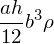

In [2]:
a, b, h, rho, y, m = symbols('a, b, h, rho, y, m')
Jyy = (y**2 * rho * h * (a-a/b*y)).integrate((y, 0, b))
Jyy

Upoštevanje mase:

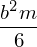

In [3]:
Jyy.expand().subs(rho*a*b*h/2, m)

Izračunajmo še s številkami:

In [4]:
podatki = {'a': 1, 'b': 2, 'rho': 7800, 'h': 0.01}

In [5]:
Jyy.subs(podatki)

Vprašanje 2: Izračunajte integral tudi numerično. Uporabite ``scipy.integrate`` in integrirajte glede na pravila: trapezno, Simpsonovo 1/3. Rezultat primerjajte tudi z Gaussovo kvadraturo. Raziščite natančnost in hitrost metod.

Definirajmo najprej funkcjo, ki jo je treba integrirati:

In [6]:
def f(y, p=podatki):
    """
    y: spremenljivka
    p: slovar s podatki: a, b, rho, h
    """
    return y**2 * p['rho']* p['h'] * (p['a']-p['a']/p['b']*y)

In [7]:
from scipy import integrate

Da dobimo občutek o funkciji, ki jo integriramo, jo prikažimo.

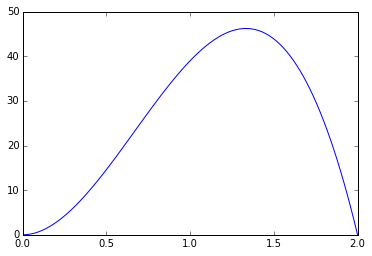

In [8]:
# Definiramo meje integrala 
podatki['ma'] = 0
podatki['mb'] = 2

N = 100
y_d = np.linspace(podatki['ma'], podatki['mb'], N)
f_d = f(y_d, podatki)
plt.plot(y_d, f_d);

In [9]:
#%%timeit
dy = y_d[1]-y_d[0]
integrate.trapz(f_d, dx=dy)

In [10]:
#%%timeit
integrate.simps(f_d, dx=dy)

In [11]:
#%%timeit
integrate.quad(f, 0, podatki['b'], args=podatki)

Vprašnje 3: Preštudirajte ``scipy.special.legendre``, ki vam vrne objekt ``orthopoly1d``. Ta objekt ima metodo ``weights``, ki vrne seznam ``[x, w, mu0]`` vrednosti, ki jih uporabimo pri Gaussovi kvadraturi. (Če tukaj vsega ne razumete, ne skrbite preveč, bo asistent pokazal/komentiral). Opazite lahko, da smo vrednosti izpeljali na predavanjih!

In [12]:
from scipy import special

Pripravimo Legendrev polinom izbrane stopnje (poskusite več različnih):

In [13]:
poli = special.legendre(3)

Pogledamo vozlišča, uteži:

In [14]:
poli.weights

array([[ -7.74596669e-01,   5.55555556e-01,   5.55555556e-01],
       [ -4.78946310e-17,   8.88888889e-01,   8.88888889e-01],
       [  7.74596669e-01,   5.55555556e-01,   5.55555556e-01]])

Vprašanje 4: S pomočjo zgoraj pridobljenih uteži in vozlišč izračunajte integral s pomočjo Gaussove kvadrature: $\sum_iw_i\,f(x_i)$. Pazite na transformacijo mej:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$

Pripravimo delni rezultat:

In [15]:
aa = [w*f(((podatki['mb']-podatki['ma'])*x + podatki['mb']+podatki['ma'])/2, podatki) for x, w, mu0  in poli.weights]
aa

Upoštevamo transformacijo mej in izračunamo integral:

In [16]:
(podatki['mb']-podatki['ma'])/2*np.sum(aa)

In [17]:
integrate.newton_cotes(rn=3)

(array([ 0.375,  1.125,  1.125,  0.375]), -0.0375)